# Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):# fig_extension="png", resolution=300
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Fetch the data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Call the function that retrieves the data from online
fetch_housing_data()

## Explore the data with pandas

In [4]:
import pandas as pd

#Function that reads the csv containing the comma separated data into a pandas dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


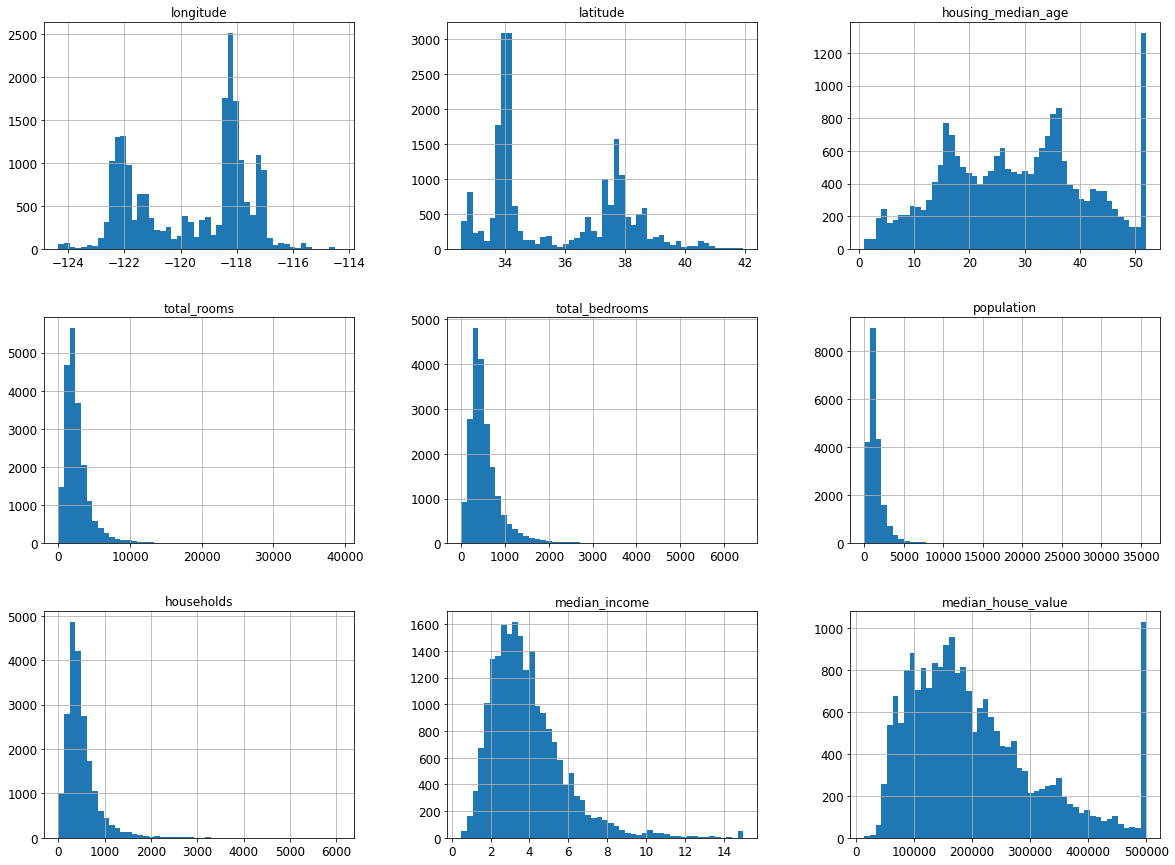

In [9]:
#Plot a histogram for each numerical attribute
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

# Create a Test set and a Train set

## Test set using random sampling

In [10]:
#Now we create a test_set (to not look at) and a train_set USING RANDOM SAMPLING WITH FIXED SEED

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set.info()
print()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-nul

## Test set using stratified sampling

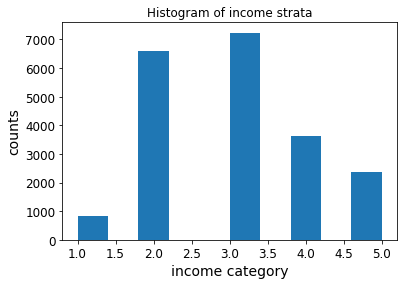

In [11]:
#Now we create a test_set (to not look at) and a train_set using STRATIFIED SAMPLING

#Create the strata = income levels
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels=[1,2,3,4,5])

#housing["income_cat"].hist(); #This is the short way and the semicolon is to hide description text before plot

fig, ax = plt.subplots(1, 1)
ax.hist(housing["income_cat"])
ax.set_ylabel("counts")
ax.set_xlabel("income category")
ax.set_title("Histogram of income strata")

plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
#We measure the proportion of each income category in the test set:
proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
print("Proportion of each income category in the Test_set:")
print(proportions)
print("Proportions add to:", sum(proportions))
print("\n")

#We measure the proportion of each income category in the whole dataset:
proportions = housing["income_cat"].value_counts() / len(housing)
print("Proportion of each income category in the Whole dataset:")
print(proportions)
print("Proportions add to:", sum(proportions))



Proportion of each income category in the Test_set:
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64
Proportions add to: 1.0


Proportion of each income category in the Whole dataset:
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Proportions add to: 1.0


## Compare the random and the stratified tests sets

Train set = the one used to create our model<br>
Test set= the one used to validate our model<br>
<br>
The idea is that the test set can be obtained by sampling a part of the whole dataset in different ways, but obviously we want that the subset that we use to validate our model is representative of the whole dataset. If there is bias between the test set and the whole data set, no matter how much we train our model is, it will not accurately describe the whole dataset because we will be aiming to describe sth different (the test set).

In [13]:

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

#% Error= [(x - y)/y]*100
compare_props["Rand. %error"] = 100*((compare_props["Random"]-compare_props["Overall"])/compare_props["Overall"])
compare_props["Strat. %error"] = 100*((compare_props["Stratified"]-compare_props["Overall"])/compare_props["Overall"])
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [14]:
#Now we remove the income_cat attribute so the data is back to its original form
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


## Data visualization

In [15]:
#We are gonna explore the Training set
#We make a separate copy not to harm the wholedataset accidentally

housing = strat_train_set.copy()

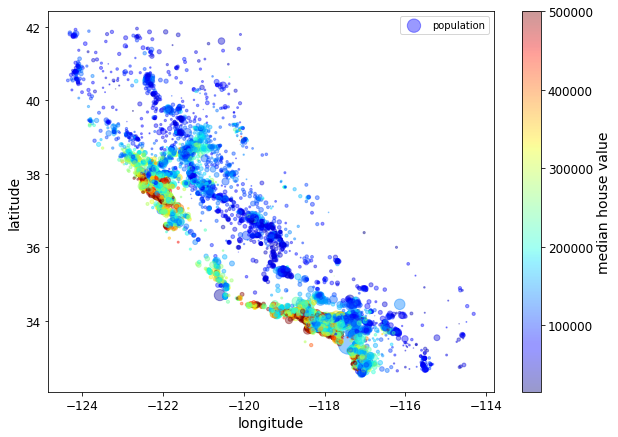

In [16]:
#housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) # This is plotting with pandas straight

fig, ax = plt.subplots(1,1,figsize=(10,7))
mapa = ax.scatter(x=housing.longitude, y=housing.latitude, alpha=0.4, 
           s=housing.population/100, label="population",
           c=housing.median_house_value, cmap="jet")
cbar = plt.colorbar(mapa)
cbar.set_label('median house value')

ax.set_ylabel("latitude")
ax.set_xlabel("longitude")
ax.legend()
plt.show()

### Looking for correlations

In [17]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

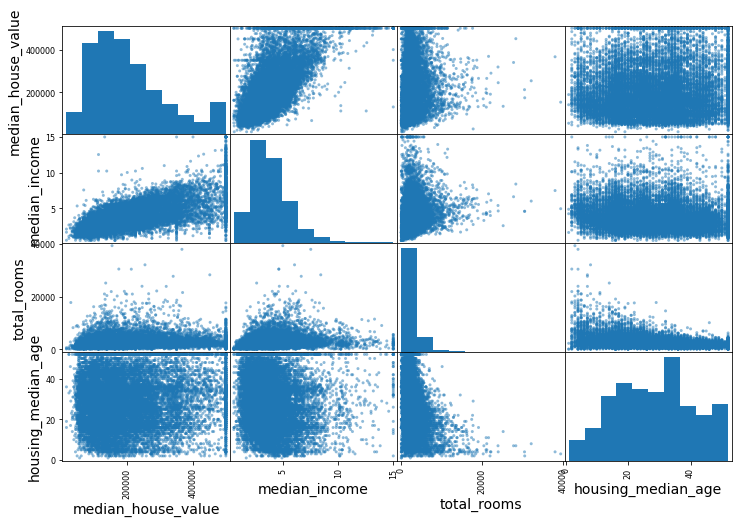

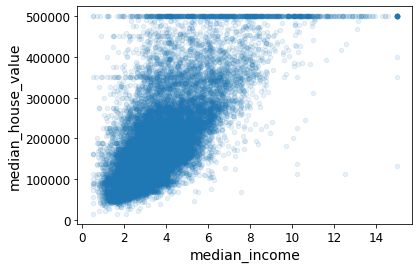

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

print()
housing.plot(kind="scatter",  x='median_income', y='median_house_value', alpha=0.1);

# Create attribute combinations

In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Separate Train dataset into: Train predictors and Train Labels(targets) 

In [21]:
# We create another clean copy of the train_set but,
# this time we drop the Target attribute to not mess with it (don't transform it)
housing = strat_train_set.drop("median_house_value", axis=1)

#We create a set that contains the labels 
housing_labels = strat_train_set["median_house_value"].copy()

# Data cleaning

## Deal with 'na' values

In [22]:
#Now we address the attribute(column) with missing (na) values, for instance "total_bedrooms" 

housing.dropna(subset=["total_bedrooms"])    # Get rid of the rows(districts) that have missing value
housing.drop("total_bedrooms", axis=1)       # Get rid of the whole attribute
median = housing["total_bedrooms"].median()  # Set the (na) to some value, ie. zero, mean, median, mode...
housing["total_bedrooms"].fillna(median, inplace= True)

In [23]:
# With Sklearn we can replace directly the na of every attribute for the attribute median for instance

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")               #instanciate the Imputer
housing_num = housing.drop("ocean_proximity", axis =1)   #Create a copy of the training set without text attributes
imputer.fit(housing_num)# The imputer calculates the median of every attribute and stores it in "statistics_"

imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [24]:
medians= housing_num.median().values #Check the imputer has indeed calculated the medians
print(medians)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [25]:
X = imputer.transform(housing_num) #The imputer transforms the whole dataset --> imputs the medians for the na's

#the result is np. array so we need to put it back in pandas DataFrame shape                                 
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)


## Deal with text values

In [26]:
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#look at the first 10 rows of ocean proximity attribute, now-encoded into numerical categories
housing_cat_encoded[:10] 

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
ordinal_encoder.categories_#get the list of categories we now have numerically encoded
print(ordinal_encoder.categories_[0])
print("Number of categories=",len(ordinal_encoder.categories_[0]))

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Number of categories= 5


### One hot encoding
Since our categories are not ordinal like for instance "bad", "average" "good" "excellent", what we do is to create one binary attribute for each category that tells us if this category is the chosen one. So for each category we'll have a separate vector that has 1's only when the row entry = this category and 0's otherwise. 

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

#The Scipy sparse matrix contains only the locations of the non-zero entries of the matrix 
# is a better way to store info coz after the one-hot encogding we only have one entry in 
# each row that is a 1 - the one for the category that the row of the original set is. 

# To see the "dense" numpy matrix with all the zero's and 1's we can use:
housing_cat_1hot.toarray() 
# Not recommended when we have a lot of categories

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
#Get the list of categories we now have numerically encoded
cat_encoder.categories_
print(cat_encoder.categories_[0])
print("Number of categories=",len(cat_encoder.categories_[0]))

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Number of categories= 5


## Transformers and Scaling

### Custom transformers

In [31]:
#Create a class to combine the attributes discussed earlier

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_adder.transform(housing_num.values)




In [32]:
# We convert the result (np. array) to a pandas data frame to see better.
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_num.columns)+["rooms_per_household", "population_per_household"],
    index=housing_num.index)

#housing_extra_attribs.head()
housing_extra_attribs.loc[[0,1,2,3,4]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()), #Could use a different scaler like "normalize = MinMaxScaler"
    ])


housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
housing_num_tr.shape

(16512, 10)

In [35]:
# We convert the result (np. array) to a pandas data frame to see better.
housing_num_tr = pd.DataFrame(
    housing_num_tr,
    columns=list(housing_num.columns)+["rooms_per_household", "population_per_household"],
    index=housing_num.index)

housing_num_tr.loc[[0,1,2,3,4]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,-1.326011,1.048079,0.981881,-0.814898,-0.985749,-0.983918,-0.987561,2.335755,0.591098,-0.046693
1,-1.321015,1.038724,-0.608648,2.093416,1.392573,0.879605,1.706186,2.323260,0.305455,-0.085168
2,-1.331006,1.034046,1.856671,-0.540388,-0.837256,-0.827952,-0.851809,1.775192,1.090409,-0.025397
3,-1.336002,1.034046,1.856671,-0.630644,-0.727712,-0.772378,-0.740014,0.927734,0.144334,-0.047350
4,-1.336002,1.034046,1.856671,-0.465564,-0.618168,-0.766103,-0.633541,-0.015583,0.322194,-0.078985


In [36]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
housing_prepared.shape

(16512, 15)

In [38]:
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
#the result is np. array so we need to put it back in pandas DataFrame shape to take a look at the transformations
housing_prepared_df = pd.DataFrame(housing_prepared, 
                                   columns=list(housing_num.columns)+
                                   ["rooms_per_household", "population_per_household"]+
                                   ['OP_cat1','OP_cat2','OP_cat3','OP_cat4', 'OP_cat5'],
                                   index= housing.index)

housing_prepared_df.loc[[0,1,2,3,4]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,OP_cat1,OP_cat2,OP_cat3,OP_cat4,OP_cat5
0,-1.326011,1.048079,0.981881,-0.814898,-0.985749,-0.983918,-0.987561,2.335755,0.591098,-0.046693,0.0,0.0,0.0,1.0,0.0
1,-1.321015,1.038724,-0.608648,2.093416,1.392573,0.879605,1.706186,2.323260,0.305455,-0.085168,0.0,0.0,0.0,1.0,0.0
2,-1.331006,1.034046,1.856671,-0.540388,-0.837256,-0.827952,-0.851809,1.775192,1.090409,-0.025397,0.0,0.0,0.0,1.0,0.0
3,-1.336002,1.034046,1.856671,-0.630644,-0.727712,-0.772378,-0.740014,0.927734,0.144334,-0.047350,0.0,0.0,0.0,1.0,0.0
4,-1.336002,1.034046,1.856671,-0.465564,-0.618168,-0.766103,-0.633541,-0.015583,0.322194,-0.078985,0.0,0.0,0.0,1.0,0.0


# Select and Train a ML model

## Linear regression model

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#Try the linear regression model in some instances of the data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

#We see that linear regressions works but not so well, so let's measure the RMSE of the whole dataset next

Predictions: [ 88308.5135735  304174.12243205 154135.1578518  183826.73869117
 247307.37672157]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### RMSE (root mean square error, aka. R²)

In [41]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.35422344579

Median_housing_values range between (120000$ - 265000$), so an error of ~68000$ is kinda large so our predictions are not very good. So we are probably underfitting. Therefore, we have 3 options:

1. Select a more powerful model 
2. Feed the training model with better features/attribute-combinations
3. Reduce constraints of the model

Here option 3 is not availabe coz linear regression is not constrained in any way.
So let's start with option 1 and try a Decision Tree model next.

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
# At this point the model is trained, let's predict and evaluate its prediction against our labels

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse


0.0

The model is giving us no error, let's look at some instances and check that there's no error indeed.

In [43]:
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 72100. 279600.  82700. 112500. 238300.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


There's 0.0 error. However, this doesn't mean the model is just perfect, instead it may be clearly overfitting.
So, we need to find a way to better evaluate the goodness of the model.

### Cross validation

In [44]:
#Calculate cross validation scores:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Sklearn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (ie., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [45]:
#This is to look at the scores of the model after the cross validation which trains the model with 10 subsets
# in a randomized fashion. Read O'Reilly page 74 (printed version 2nd edition)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70537.55592019 69036.03113647 69356.87915716 72101.36041459
 68341.31831484 76462.61774776 70126.3225708  70653.68628473
 67758.97848724 72425.50184363]
Mean: 70680.02518774086
Standard deviation: 2393.498122818242


Now, we calculate the cross-validation too for the linear regression model to compare. 

In [46]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [72327.16076767 64517.26490514 68064.68293242 69115.0013636
 67146.11690224 73027.74105799 70586.20149172 69341.53755437
 66928.91520262 70506.05866694]
Mean: 69156.06808447083
Standard deviation: 2462.909908120936


In [47]:
pd.Series(np.sqrt(-lin_scores)).describe()

count       10.000000
mean     69156.068084
std       2596.134994
min      64517.264905
25%      67375.758410
50%      69228.269459
75%      70566.165786
max      73027.741058
dtype: float64

The linear regression model does better than the Decision Tree, which overfits so bad that in the end it gives worse predictions than a simple regression. <br>
Let's try the Random Forest model and compare too.

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mse


350351785.3541092

In [49]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51628.51404002 49160.40744889 46943.97711172 52042.56091759
 47335.8607491  51124.48895933 52543.46360825 50055.3562137
 48058.80028518 53769.55403086]
Mean: 50266.29833646565
Standard deviation: 2212.9467981687344


### Save your model hyperparmeters, trained parameters and predictions

For that we use Pyhton pickle module OR joblib library (see below) which is faster. 
You need to further read how this really works

In [50]:
import joblib

filename = "saved_model.pkl"
joblib.dump(forest_reg, filename)


['saved_model.pkl']

In [51]:
#and later...
loaded_model = joblib.load(filename)


#result = loaded_model.score(X_set, Y_set)

#This result is comparing a) with b) where:
#   a) are the predictions made by using the model trained with X_set, 
#   b) are the true labels for this dataset, so Y_set 
# If we wanted to see how good our model works on the train dataset we'll do:
# result = loaded_model.score(X_train, Y_train)
# If we wanted to see how good our model works on unseen data, we'll do:
# result = loaded_model.score(X_test,Y_test)

#the score is the default, which may be R^2 for regressors, accuracy for classifiers, etc, you need to read documentation.

result = loaded_model.score(housing_prepared, housing_labels) #Here we are seeing the goodness of our model on the training set.

print(result) 

0.9738269592787278


# Fine-tune your models

## Grid search

We define a parameter grid to scan using cross-validation whith score used being MSE

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)


#cv = 5-fold cross-validation, ie. train the model 5 times at each combination of hyperparameters.

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
# to get directly the best combination of parameters from our defined grid 
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Notice these are the max values we set for the hyperparam grid for n_estimators and max_features respectively. Hence, if we r finding that this is so far the best combination of hyperparams it may mean that the truly best are above these values. 

In [54]:
#to get the best estimator directly:

grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62742.7486280195 {'max_features': 2, 'n_estimators': 3}
54844.05439779493 {'max_features': 2, 'n_estimators': 10}
51821.91787705242 {'max_features': 2, 'n_estimators': 30}
58964.048279076604 {'max_features': 4, 'n_estimators': 3}
52283.026089831794 {'max_features': 4, 'n_estimators': 10}
50106.46913248787 {'max_features': 4, 'n_estimators': 30}
58568.973225240974 {'max_features': 6, 'n_estimators': 3}
51701.237794732384 {'max_features': 6, 'n_estimators': 10}
49602.03070252652 {'max_features': 6, 'n_estimators': 30}
58086.786160603566 {'max_features': 8, 'n_estimators': 3}
51940.679113463055 {'max_features': 8, 'n_estimators': 10}
49880.34682809899 {'max_features': 8, 'n_estimators': 30}
61689.466642908264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53776.18211746729 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59143.344686064454 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51964.44867392333 {'bootstrap': False, 'max_features': 3, 'n_estimato

We can take a look at it as a table, which is easier

In [56]:
#pd.DataFrame(cvres)

Notice the RMSE score for the best combination of hyperparams (max_features=8, n_estimators=30) gives us 50016.25227003381 which is slightly better than when we runed the random_forest model earlier without fine tuning the hyperparams (befoe we got RMSE = 50303.64565723034).

## Randomized search

The grid approach is fine when you are exploring relatively few combinations. For large hyperparameters spaces it's preferable to do a randomized search.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe023150160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe023164ca0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48768.701080344814 {'max_features': 7, 'n_estimators': 180}
50462.17626538565 {'max_features': 5, 'n_estimators': 15}
49925.161286319555 {'max_features': 3, 'n_estimators': 72}
49959.110535087246 {'max_features': 5, 'n_estimators': 21}
48890.74865776528 {'max_features': 7, 'n_estimators': 122}
49907.01937287148 {'max_features': 3, 'n_estimators': 75}
49839.25700011579 {'max_features': 3, 'n_estimators': 88}
48843.24364023964 {'max_features': 5, 'n_estimators': 100}
49631.771524641415 {'max_features': 3, 'n_estimators': 150}
62289.6941280454 {'max_features': 5, 'n_estimators': 2}


# Analyse the best models and their errors

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.57203252e-02, 8.00185371e-02, 4.26287283e-02, 1.93629653e-02,
       1.76567913e-02, 1.91445389e-02, 1.71047105e-02, 3.83210593e-01,
       6.39157620e-02, 1.11517563e-01, 1.25256382e-02, 1.31267657e-01,
       1.41937422e-04, 6.03927152e-03, 9.74498077e-03])

Now let's display these importance scores next to their corresponding attribute names:

In [60]:
# NEED TO REVIEW/ FULLY UNDERSTAND THIS PART  -.-U

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3832105934649669, 'median_income'),
 (0.13126765719943628, '<1H OCEAN'),
 (0.11151756278842777, 'pop_per_hhold'),
 (0.08572032517292644, 'longitude'),
 (0.08001853712265905, 'latitude'),
 (0.0639157620369085, 'rooms_per_hhold'),
 (0.04262872830238621, 'housing_median_age'),
 (0.019362965296641263, 'total_rooms'),
 (0.01914453886659306, 'population'),
 (0.017656791322805513, 'total_bedrooms'),
 (0.017104710491944244, 'households'),
 (0.012525638224699964, 'bedrooms_per_room'),
 (0.009744980771859015, 'NEAR BAY'),
 (0.0060392715158135565, 'ISLAND'),
 (0.0001419374219323748, 'INLAND')]

With this information we may want to drop some of the least important features. Apparently 'ocean_proximity' is the very important one. 

# Evaluate on the Test Set

In [61]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

#!!! IMPORTANT: Just transform the test set, do not fit !!
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)


47357.74666871751


## Confidence interval

In [62]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors))
       )
# We do the np.sqrt() on the found confidence interval because we care here about the RMSE,
# so we want the confidence interval of the root(MSE)

array([45396.13315993, 49241.27773731])

### Explanation for confidence interval

Let's put an example of how to calculate the confidence interval for any measure / statistic that we care. Above we were calculating the confidence interval of the "generalization error" = squared_errors. But we could calculate in the way I'm gonna show below, the confidence interval of any sample that it (behind the scenes) normally distributed. So far, I think this is the assumption for using the t-distribution.
#### The above may be reviewed you still need to read on that topic...

In [63]:
#This is a minimal example on how to use scipy.stats.t.interval():
import scipy

sample = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = scipy.stats.sem(sample)

#compute confidence interval for `sample`
confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, 
                                             sample_mean, sample_standard_error)

# The sample_standard_error = the standard error of the mean (SEM), which is the =scipy.stats.sem(sample)

print(confidence_interval)

(2.8949158625700564, 7.105084137429944)


# つづく